### Added 30% of duplicates 

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import duplicates_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

duplicates_utils.drop_negative_age(df)

## Adding duplicates

In [2]:
print('--------------------------------------')
duplicates_utils.print_duplicates_values(df) 

print(f'\nADDING 30% TO FEATURE \n')

df = duplicates_utils.replace_duplicates_values(df, 30)
duplicates_utils.print_duplicates_values(df)

--------------------------------------
Number of rows:  9984
Duplicate Counts:  0
Percentage of Duplicate Values:  0.0

ADDING 30% TO FEATURE 

Number of rows:  9984
Duplicate Counts:  2995
Percentage of Duplicate Values:  29.997996794871796


## Decision Tree

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      3441
           1       0.95      1.00      0.97      3547

    accuracy                           0.97      6988
   macro avg       0.97      0.97      0.97      6988
weighted avg       0.97      0.97      0.97      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1518
           1       0.92      0.99      0.95      1478

    accuracy                           0.95      2996
   macro avg       0.96      0.95      0.95      2996
weighted avg       0.96      0.95      0.95      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      4999
           1       0.92      0.99      0.95      4985

    accuracy                           0.95      9984


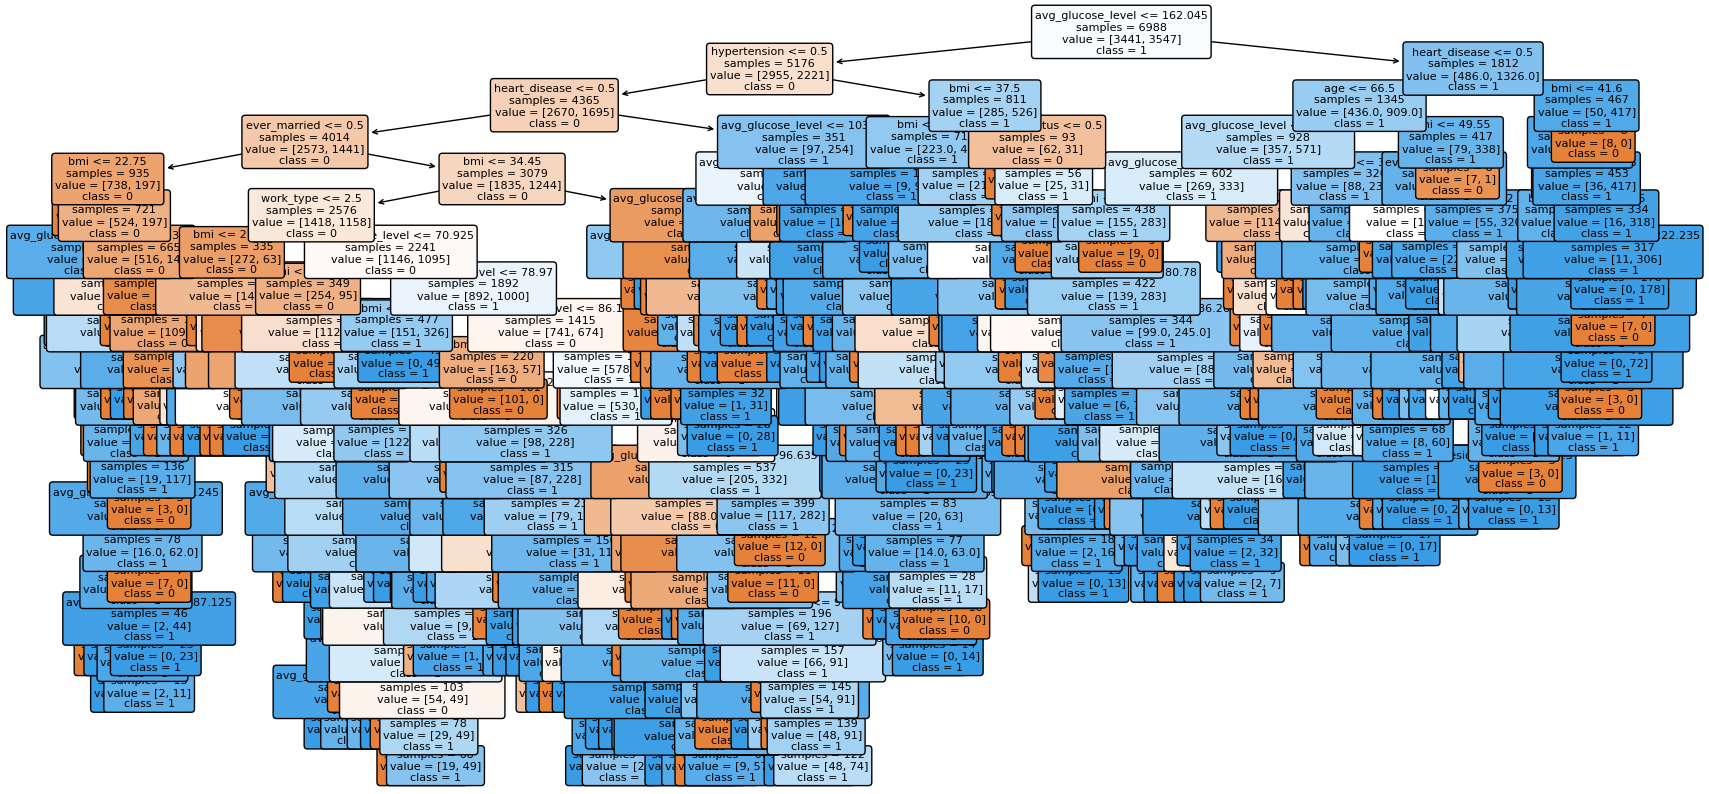

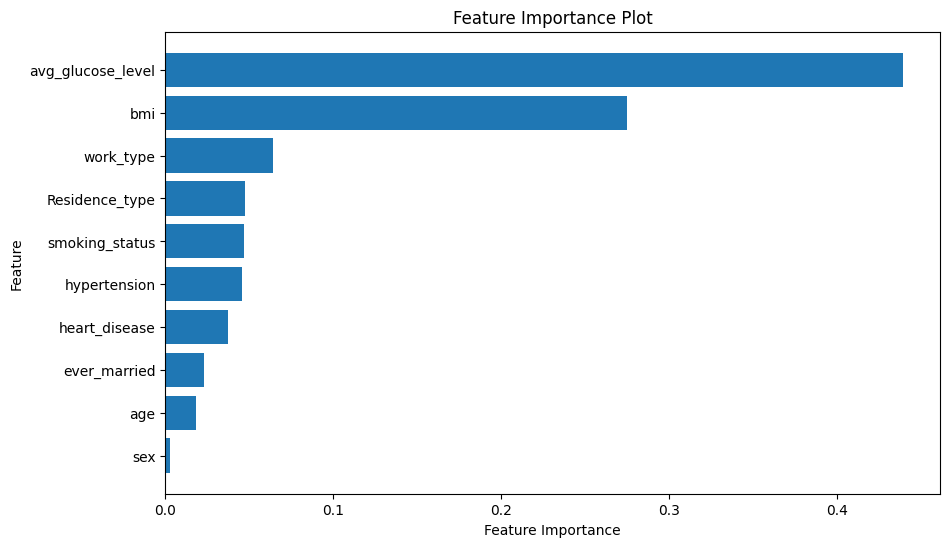

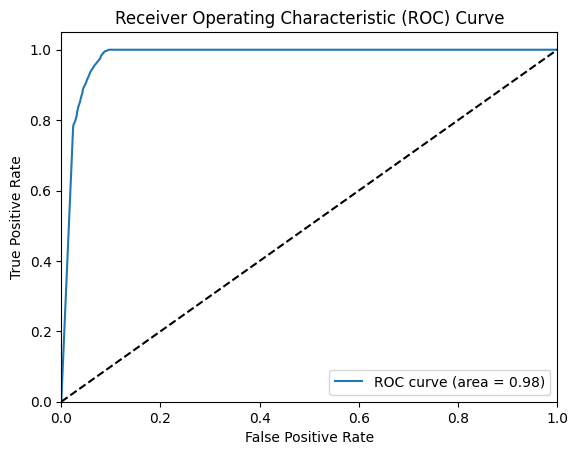

AUC Score: 0.9797954174586171


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9527896995708155, 0.949928469241774, 0.9456366237482118, 0.9570815450643777, 0.949928469241774, 0.9542203147353362, 0.9456366237482118, 0.9585121602288984, 0.9398280802292264, 0.9469914040114613]
Mean accuracy: 0.9500553389820088
95% confidence interval: (0.945933658364694, 0.9541770195993236)


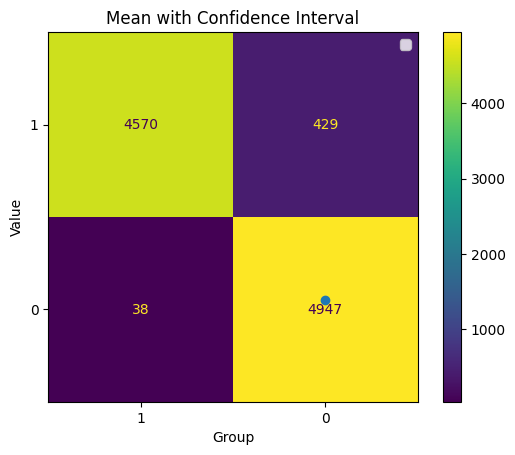

In [3]:
decision_tree = ML_algorithms.train_decision_tree_model(df, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df)


## Hist Gradient Boosting Classifier

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 52.49647903442383
Best parameters found:  {'l2_regularization': 0.3, 'learning_rate': 0.3, 'max_depth': 8, 'max_iter': 464, 'min_samples_leaf': 5}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3441
           1       1.00      1.00      1.00      3547

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1518
           1       0.99      1.00      0.99      1478

    accuracy                           0.99      2996
   macro avg       0.99      0.99      0.99      2996
weighted avg       0.99      0.99      0.99      2996



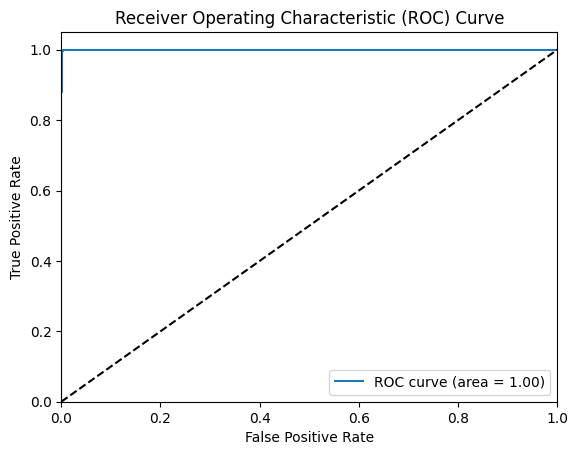

AUC Score: 0.9996627610376639


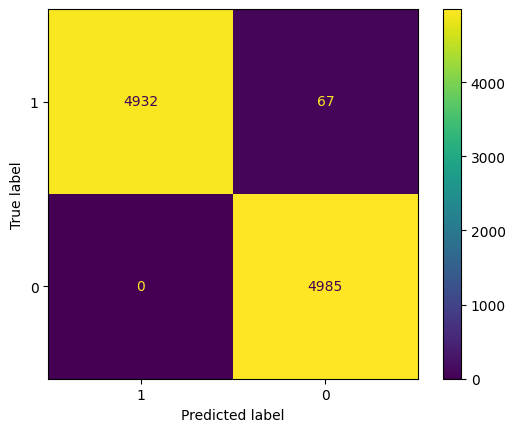

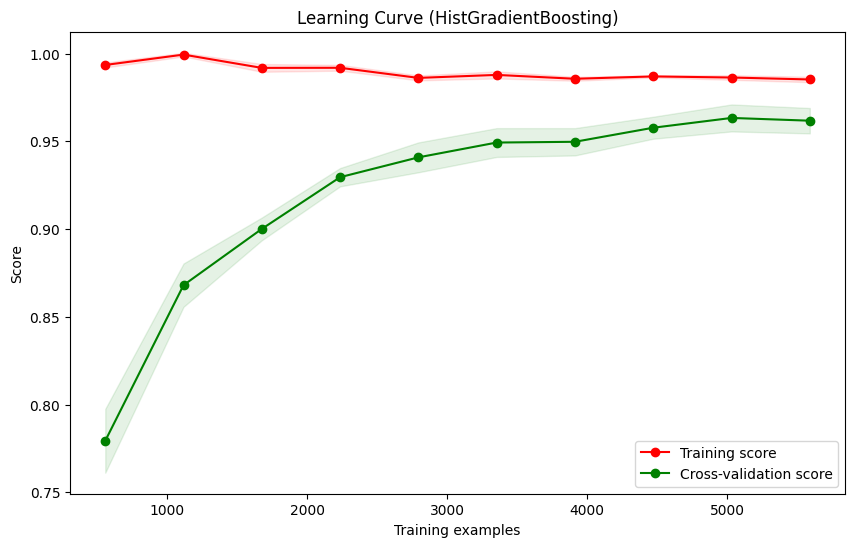

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9928469241773963, 0.9856938483547926, 0.9928469241773963, 0.9914163090128756, 0.9914163090128756, 0.9985693848354793, 0.9871244635193133, 0.9899856938483548, 0.9885386819484241, 0.9871060171919771]
Mean accuracy: 0.9905544556078884
95% confidence interval: (0.9878576833399878, 0.9932512278757889)


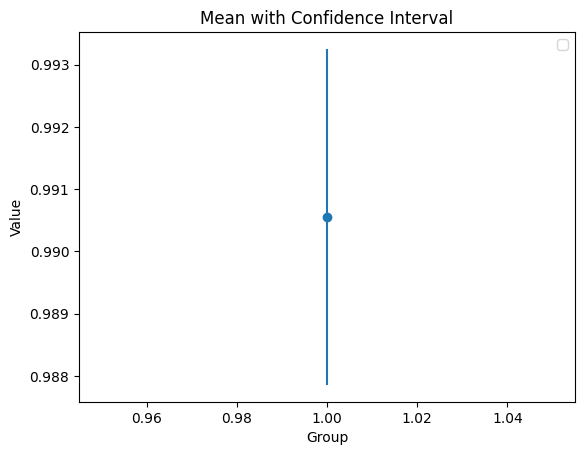

--------------------------------------


In [4]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)

print('--------------------------------------')